In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tensorboardX import SummaryWriter
from torch.autograd import Variable
from torchviz import make_dot, make_dot_from_trace
import tensorwatch

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)

        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)


if __name__ == '__main__':
    net = Net()
#     net.eval()
    x = Variable(torch.randn(1, 3, 32, 32))
    # writer = SummaryWriter('./heatmap')
    # writer.add_graph(net, x)
    # writer.close()

    # dot = make_dot(net(x), params=dict(net.named_parameters()))
    # dot.format = 'png'
    # dot.render()

    # with torch.onnx.set_training(net, False):
    #     trace, _ = torch.jit.get_trace_graph(net, args=(x,))
    # do = make_dot_from_trace(trace)
    # do.format = 'png'
    # do.render()

In [6]:
tensorwatch.model_stats(net, [1, 3, 32, 32])

,module name,input shape,output shape,params,memory(MB),MAdd,Flops,MemRead(B),MemWrite(B),duration[%],MemR+W(B)
0,conv1,3 32 32,6 28 28,456.0,0.02,"705,600.0","357,504.0",14112.0,18816.0,34.46%,32928.0
1,pool1,6 28 28,6 14 14,0.0,0.00,"3,528.0","4,704.0",18816.0,4704.0,15.24%,23520.0
2,conv2,6 14 14,16 10 10,2416.0,0.01,"480,000.0","241,600.0",14368.0,6400.0,20.41%,20768.0
3,pool2,16 10 10,16 5 5,0.0,0.00,"1,200.0","1,600.0",6400.0,1600.0,8.46%,8000.0
4,fc1,400,120,48120.0,0.00,"95,880.0","48,000.0",194080.0,480.0,11.83%,194560.0
5,fc2,120,84,10164.0,0.00,"20,076.0","10,080.0",41136.0,336.0,4.87%,41472.0
6,fc3,84,10,850.0,0.00,"1,670.0",840.0,3736.0,40.0,4.73%,3776.0
total,,,,62006.0,0.03,"1,307,954.0","664,328.0",3736.0,40.0,100.00%,325024.0


/home/hanwei-1/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


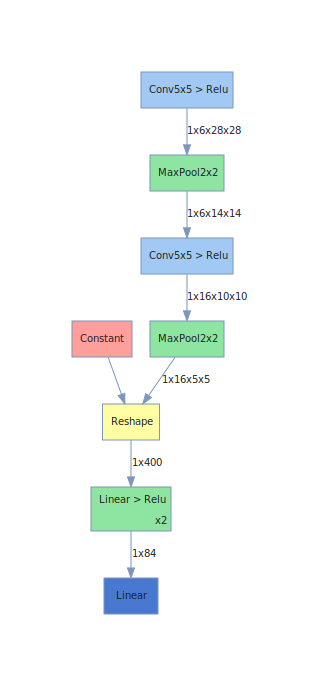

In [20]:
tensorwatch.draw_model(net, [1, 3, 32, 32])

In [8]:
netshow = tensorwatch.draw_model(net, [1, 3, 32, 32])

/home/hanwei-1/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [19]:
netshow.save(path='/home/hanwei-1/pytorch-classification/visualzation/ss',format='png')